## Intro to Linear Regression

**Nick Kern**
<br>
**Astro 9: Python Programming in Astronomy**
<br>
**UC Berkeley**

A very important concept in data analysis (and more broadly statistics) is [linear regression](https://en.wikipedia.org/wiki/Linear_regression). In this lecture, we will explore how to perform linear regression on basic data sets.

What we mean by "linear regression" is effectively just fitting curves to data. The data may look like it follows some underlying distribution, but it doesn't have to. It could be very noisy data, for example.

<img src='imgs/noisy_data.png' width=500px/>
<center>Data that follows the same underlying line, but has less noise (left) and more noise (right) along the y-axis</center>

Note that the term "linear regression" does not mean that the data itself is linear. The data could be linear, but it could also be quadratic, or cubic, etc. We could, for example, use linear regression to fit lines and curves to all of the following datasets.

<img src='imgs/lin_reg.png' width=700px/>
<center>Three data sets with best-fitting lines using linear regression</center>

Linear regression is a way of saying, "we have some *data*, what is the *model* that can best reproduce the data?" The "linear" in the term linear regression refers not to the data, but to the underlying model we are attempting to fit for. Let's use standard polynomials as an example.

In general, a standard polynomial can be written as

\begin{align}
y = a_0\cdot x^n + a_1\cdot x^{n-1} + \ldots + a_{n-1}\cdot x^1 + a_n\cdot x^0
\end{align}

where $y$ is the dependent variable, $x$ is the independent variable and $a_n$ are the coefficients of each term in the polynomial. Note that the model function, $y$, is *linear with respect to the coefficients, $a$.* In other words, we don't have terms like $a_n^2$, or $\sin(a_n)$ in the equation. This means we can therefore write it as

\begin{align}
\boldsymbol{y} = \boldsymbol{A}\boldsymbol{x}
\end{align}

where $\boldsymbol{y} = [y],\ \boldsymbol{A} = [x^n, x^{n-1}, \ldots, x^1, x^0],$ and $\boldsymbol{x} = [a_0, a_1, \ldots, a_n]$, and $\boldsymbol{A}\boldsymbol{x}$ denotes a *dot product*. Note that $\boldsymbol{x}$ in the above equation **is not** $x$ in the other equation, but is a vector containing the polynomial weights. Any set of equations we can decompose like this is considered a linear model. **The goal of linear regression is to solve for the weights of our model, $\boldsymbol{x}$.**

Once we've chosen our model, say a 1st order polynomial (which is a line), how can we use linear regression to find the best fit (i.e., to regress for the weight vector)? We can do this with a method known as **Linear Least Squares** (LLS). 

### Linear Least Squares

In the linear least squares method, we construct what's called an *objective function*, which is something that is a function of our model weights and our data, $f(\boldsymbol{x}\ |\ \boldsymbol{y})$. The choice of $\boldsymbol{x}$ that minimizes $f$ gives us our best-fit. The simplest objective function is the sum of the squared distances of the model predictions from the data, which is to say

\begin{align}
f = \sum_i \left(y_i - \sum_jA_{ij}\cdot x_j\right)^2
\end{align}

This is demonstrated in the figure below.

<img src='imgs/lls.png' width=400px/>

Let's use this figure as a quantitative example. We have four data points, with $(x,y) = [(1,6),\ (2,5),\ (3,7),\ (4,10)]$. Let's say we want to fit a line to this data in the form

\begin{align}
y = a_0x + a_1
\end{align}

Given our model, we can write its predictions for the data as a system of equations, given as

\begin{align}
\left[\begin{array}{c}
y_1\\ y_2\\ y_3\\ y_4\end{array}\right]
= \left[\begin{array}{cc}
a_0x_1 + a_1\\ a_0x_2 + a_1\\ a_0x_3 + a_1\\ a_0x_4 + a_1
\end{array}\right]
\end{align}


We can further represent this in the matrix form we saw before as

\begin{align}
\left[\begin{array}{c}
y_1\\ y_2\\ y_3\\ y_4\end{array}\right]
&= \left[\begin{array}{cc}
x_1\ 1\\ x_2\ 1\\ x_3\ 1\\ x_4\ 1\end{array}\right]\cdot
\left[\begin{array}{c}
a_0\\ a_1\end{array}\right]\\
\\
\boldsymbol{y} &= \boldsymbol{A}\boldsymbol{x}
\end{align}

The question we want to answer is, what choice of $a_0$ and $a_1$ give us the best-fit line? Well, let's just take a wild guess (not looking at the figure) and say $a_0 = 2$ and $a_1 = 1$. How good is this fit? To answer that question, let's evaluate our objective function, $f$. The data, $y_n$, are just the y-values of the data: $y = [6, 5, 7, 10]$. Our model prediction is found by evaluating $2\cdot x + 1$ for $x = [1,2,3,4]$. This means our objective function is:

\begin{align}
f &= \left[(6 - (2*1 + 1))^2 + (5 - (2*2+1))^2 + (7 - (2*3 + 1))^2 + (10 - (2*4 + 1))^2\right]\\
  &= 10
\end{align}

Is this a good answer? We don't know. Furthermore, we don't particularly care about any *individual* output of the objective function. What we care about is *minimizing the function*. Now let's try a better guess and see how it changes. Let's try $a_0 = \tfrac{4}{3}$ and $a_1 = 4$. Our our objective function is then

\begin{align}
f &= \left[(6 - (\tfrac{4}{3}*1 + 4))^2 + (5 - (\tfrac{4}{3}*2+4))^2 + (7 - (\tfrac{4}{3}*3 + 4))^2 + (10 - (\tfrac{4}{3}*4 + 4))^2\right]\\
  &= 4.67
\end{align}

This is a better result, meaning our second guess is a better fit to the data than our first guess! How can we do this automatically, without having to guess and check? To do that we need to minimize $f$ with respect to $x$, which we can do by taking its derivative and setting it equal to zero.


How can we minimize a function with respect to its inputs? To do that, we can take its derivative and set it equal to zero.

\begin{align}
\frac{\partial f}{\partial x_k} = \sum_i 2\left(y_i-\sum_j A_{ij}x_j\right)(-A_{ik}) = 0
\end{align}

If we re-arrange the terms above, we get the normal equations:

\begin{align}
\sum_i\sum_j A_{ik} A_{ij}\hat{x}_j = \sum_i X_{ij}y_i
\end{align}

where $\hat{x}$ is the value of $x$ that minimizes $f$. This can be rewritten in matrix notation as

\begin{align}
(\boldsymbol{A}^T\boldsymbol{A})\hat{\boldsymbol{x}} = \boldsymbol{A}^T\boldsymbol{y}
\end{align}

To solve this for $\hat{\boldsymbol{x}}$, we can take the inverse of the term on the left and multiply both sides to get:

\begin{align}
\hat{\boldsymbol{x}} = \left(\boldsymbol{A}^T\boldsymbol{A}\right)^{-1}\boldsymbol{A}^T\boldsymbol{y}
\end{align}

This is the equation we can use in order to find the best-fit $x$ for us. Let's try it in the former case of fitting a line to data.

In [1]:
%matplotlib inline
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

In [13]:
# set up data vector and design matrix
y = np.array([6.0,5.0,7.0,10.0])
A = np.array([[1.0, 1.0],
              [2.0, 1.0],
              [3.0, 1.0],
              [4.0, 1.0]])

In [14]:
# find x-hat!
xhat = np.dot(np.dot(la.inv(np.dot(A.T, A)), A.T), y)
print(xhat)

[ 1.4  3.5]


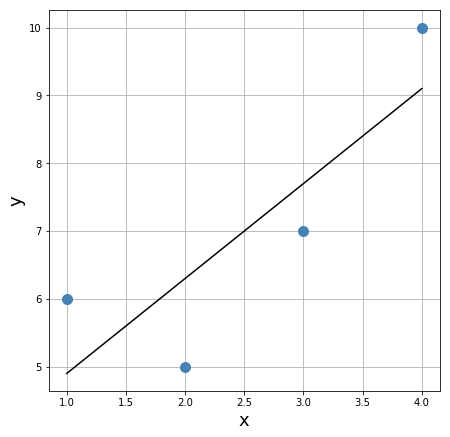

In [15]:
# graph best-fit
N = 100
xdata = np.array([1.0,2.0,3.0,4.0])
yhat = np.dot(A, xhat)

# figure
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1)
ax.grid(True)

# axes
ax.set_xlabel('x', fontsize=18)
ax.set_ylabel('y', fontsize=18)

# plot
ax.plot(xdata, y, linestyle='', marker='o', color='steelblue', markersize=10)
ax.plot(xdata, yhat, color='k')

### Breakout 1: Fit a line to data

Load the data from `data/noisydata.txt` and fit a line to it using LLS. Plot the data and your best-fit line, is it a good fit?

Hint: An easy way to generate a design matrix for a line is to do something like this:
```
np.vstack([xdata, np.ones_like(xdata)]).T
```

In [29]:
x,y = np.loadtxt('data/noisydata.txt', unpack=True)

In [50]:
A = np.vstack([x**2, x, np.ones_like(x)]).T
xhat = np.dot(np.dot(la.inv(np.dot(A.T, A)), A.T), y)
yhat = np.dot(A, xhat)

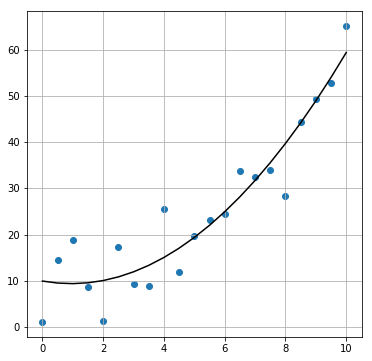

In [51]:
fig = plt.figure(figsize=(6,6))
ax=fig.add_subplot(111)
ax.grid(True)
ax.scatter(x,y)
ax.plot(x,yhat,color='k')

**Bonus**: Try fitting a quadratic to the data. Is it a better fit?

Yes its a better fit by-eye.

### Weighted Least Squares

We've looked at line-fitting for data that is relatively "well-behaved," in that it has low-noise and no apparent outlier populations. For data that is noisy, or that has some data points that have large error, we can create a new objective function to account for the measurement error on our data. We do this by *dividing by the expected measurement error*:

\begin{align}
f = \sum_i \left(\frac{y_i - \sum_jA_{ij}\cdot x_j}{\sigma_i}\right)^2,
\end{align}

where $\sigma_i$ is the measurement error on the $i$th data point. This is a way of enacting a weighting on how the data influences the best-fit. One can show through similar steps from before that our final best-fit coefficient vector can now be calculated as

\begin{align}
\hat{\boldsymbol{x}} = \left(\boldsymbol{A}^T\boldsymbol{N}^{-1}\boldsymbol{A}\right)^{-1}\boldsymbol{A}^T\boldsymbol{N}^{-1}\boldsymbol{y},
\end{align}

where the matrix $\boldsymbol{N}$ contains the variance of the error along its diagonal: 

\begin{align}
\boldsymbol{N} = \left[\begin{array}{cccc}
\sigma_0^2 & 0 & \ldots & 0\\
0 & \sigma_1^2 & \ldots & 0\\
\vdots & \vdots & \ddots & \vdots\\
0 & 0 & \ldots & \sigma_n^2\end{array}\right]
\end{align}

For data where the measurement error is the same for all data points (aka *homoscedastic*), then our weighting does not change the result. For data where certain points have larger measurement error than others (aka *heteroscedastic*), then the weighted LS will produce different results than the unweighted LS.

### Breakout 2: Use weighted LS to fit noisy data

Load-in the data from `data/heteroscedastic_data.txt`.

1.
Make a plot of the data (with errorbars), and the weighted LS best-fit and unweighted LS best-fit of a quadratic model.

Hint: To generate a diagonal matrix $\boldsymbol{N}$ given a vector of the measurement errors, `epsilon`$ = [\sigma_0,\ \sigma_1,\ \ldots,\ \sigma_n]$, use the following syntax:
```
N = np.eye(len(epsilon)) * epsilon**2
```

Don't forget you can plot data with measurement errors with the following syntax
```
ax.errorbar(xdata, ydata, yerr=yerrors, fmt='o')
```

2.
Why do you think the unweighted LS best-fit and weighted LS best-fit differ in the way they do?

In [101]:
x,y,err = np.loadtxt('data/heteroscedastic_data.txt', unpack=True)
N = np.eye(len(err)) * err**2
Ninv = la.inv(N)
A = np.vstack([x**2, x, np.ones_like(x)]).T
xhat_stand = np.dot(np.dot(la.inv(np.dot(A.T, A)), A.T), y)
yhat_stand = np.dot(A, xhat_stand)
xhat_weight = np.dot(np.dot(la.inv(np.dot(A.T,np.dot(Ninv, A))), A.T), np.dot(Ninv,y))
yhat_weight = np.dot(A, xhat_weight)

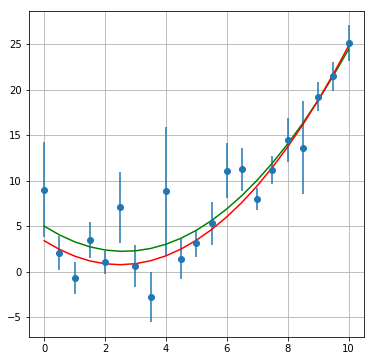

In [102]:
fig = plt.figure(figsize=(6,6))
ax=fig.add_subplot(111)
ax.grid(True)
ax.errorbar(x,y,yerr=err,fmt='o')
ax.plot(x,yhat_stand,color='g')
ax.plot(x,yhat_weight,color='r')

### Use `numpy.polyfit` to do the same thing

The `np.polyfit` function takes the following arguments
```
np.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
```

In [59]:
# fit a second order polynomial with weights
xhat_polyfit_weighted = np.polyfit(x, y, 2, w=1/err)
xhat_polyfit_unweighted = np.polyfit(x, y, 2, w=None)

# compare to weighted LS
print(xhat_weight)
print(xhat_polyfit_weighted)

print("")

# compare to unweighted LS
print(xhat_stand)
print(xhat_polyfit_unweighted)

[ 0.42585883 -2.1189598   3.3980135 ]
[ 0.42585883 -2.1189598   3.3980135 ]


[ 0.40658574 -2.12381     4.99829563]
[ 0.40658574 -2.12381     4.99829563]


### Application: Galaxy Property Correlations

Load in the `data/galaxydata.txt` file. It has three columns, $\ln[\text{Mass}]$, $\ln[\text{SFR}]$ and $12 + \ln[O/H]$. We call these the galaxies mass, star-formation rate and metallicity respectively. This is data on ten-thousand nearby galaxies taken by the Sloan Digital Sky Survey optical survey.


<img src='imgs/galaxies.png' width=400px/>
<center>A large diversity of galaxies exist in the universe.</center>


1.
On one figure, make three subplots: metallicity vs. mass, metallicity vs. SFR, and SFR vs. mass. 

You should see a correlation between all the variables in the data. The question we'd like to ask ourselves, is which variable **drives** the correlation. That is to say, are SFR and metallicity intrinsically correlated? Or are they both just correlated to mass?

To answer this, fit a line to the SFR vs. Mass relation using linear least squares. Call this line our "expected SFR". Use this line to subtract the expected SFR for each galaxy given its mass from its true SFR and call this the SFR residual:

\begin{align}
\text{SFR}_{resid} = \text{SFR}_{true} - \text{SFR}_{synth}
\end{align}

Then make a plot of metallicity vs. $\text{SFR}_{resid}$. Is a correlation between metallicity and SFR present after subtracting out the SFR vs. mass correlation?

### Regression Uncertainty

Even though we have found a best-fit line, it is important to ask, how well do we know that best-fit line? In other words, what is the uncertainty in our best-fit? Recall back to how we found the best-fit function. To do that, we looked at what choice of coefficients ***minimized our objective function $f$***. Now imagine two sets of data, both of which have minimized $f$ at the same set of coefficients, but in one case that minimum is localized, and the other is delocalized.

<img src='imgs/obj_func.png' width=400px/>
<center> Even though we have minimized the orange curve at $a_0=5$, how sure can we be that this is actually the minimum?</center>

We can rephrase the question as such: we now care not only where we minimize the objective function, but also the range of values of $a_0$ where $f$ is below some threshold. In our example above, if we set that threshold to be $f < 0.5$, then the "uncertainty" associated with the orange curve will span a larger range in $a_0$ than the blue curve. That range is what we are going to refer to as the uncertainty in $a_0$, or equivalently the uncertainty in $\hat{\boldsymbol{x}}$.

At the end of the day, we don't care as much about our fits on $\hat{\boldsymbol{x}}$. What we really care about are the predictions this best-fit line will make. If we only had a best-fit line, we would only have a best-fit prediction. What we really want, though, is a best-fit prediction **and** an estimate of our uncertainty, or its error. That errorbar is an error in our prediction on $y$, which is to say its a vertical errorbar on our graphs. 

When we do science, everything needs an errorbar: if you see a result quoted with no errorbar, be skeptical! 

The question at hand is, how to we get the uncertainty of our coefficients? Recall they are found via

\begin{align}
\hat{\boldsymbol{x}} = \left(\boldsymbol{A}^T\boldsymbol{N}^{-1}\boldsymbol{A}\right)^{-1}\boldsymbol{A}^T\boldsymbol{N}^{-1}\boldsymbol{y}
\end{align}

If we make the substitution that

\begin{align}
\boldsymbol{y} = \boldsymbol{A}\boldsymbol{x} + \boldsymbol{\epsilon}
\end{align}

we can rearrange to find that 

\begin{align}
\text{Var}[\hat{\boldsymbol{x}}-\boldsymbol{x}] =  \boldsymbol{V} = \left(\boldsymbol{A}^T\boldsymbol{N}^{-1}\boldsymbol{A}\right)^{-1}
\end{align}

This is the covariance matrix describing the uncertainty on our best-fit coefficients.

The question we need to answer though, is how to we propagate *uncertainty on our best-fit coefficients* to the *uncertainty on our best-fit predictions*? To answer this, recall the matrix formulation of a linear model:

\begin{align}
\boldsymbol{y} = \boldsymbol{A}\boldsymbol{x}
\end{align}

Assuming a quadratic form, this can be written out as

\begin{align}
y = a_0 x^2 + a_1 x + a_2.
\end{align}

Let's now specify to the error on our best-fit predictions:

\begin{align}
\hat{y} = (\hat{a}_0 \pm \delta_0)x^2 + (\hat{a}_1 \pm \delta_1)x + (\hat{a}_2 \pm \delta_2)
\end{align}

The question we asked ourselves above, was equivalent to asking what is the uncertainty (or error) on $\hat{y}$? We can get this by taking its variance:

\begin{align}
\text{Var}[\hat{y}] = \langle \hat{y}^2\rangle - \langle \hat{y}\rangle^2
\end{align}

where the angle brackets $\langle\rangle$ represent an ensemble average. Note that our uncertainties $\delta$ are not actual numbers, but are *statistical distributions*. In fact, they are a Gaussian distribution with a mean of zero and a standard deviation of $\delta$. The important thing to recognize here is that the ensemble average (i.e. mean) of a mean-zero distribution is, as you may have suspected, zero! This means (and you can show this) that the variance on our predictions $\hat{y}$ simplifies to

\begin{align}
\text{Var}[\hat{y}] = \boldsymbol{C} = \boldsymbol{A}\boldsymbol{V}\boldsymbol{A}^T
\end{align}

The error is the standard devation, which is the square root of the diagonal of our covariance matrix $\boldsymbol{C}$.

Let's see this in action with our previous example of data with heteroscedastic errors.

In [111]:
# load data
x,y,err = np.loadtxt('data/heteroscedastic_data.txt', unpack=True)

# create error matrix and invert it
N = np.eye(len(err)) * err**2
Ninv = la.inv(N)

# fit a quadratic to it
fit, V = np.polyfit(x, y, 2, w=1/err, cov=True)

# create new x-arr
x_arr = np.linspace(0,10,101)

# create design matrix
A = np.vstack([x_arr**2, x_arr, np.ones_like(x_arr)]).T


# find model predictions
yhat = np.dot(A, fit)

# get errors
C = np.dot(np.dot(A, V), A.T)
yhat_errs = np.sqrt(C.diagonal())

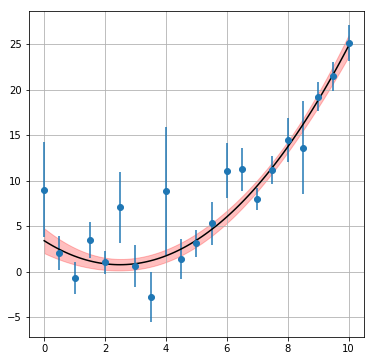

In [120]:
# figure
fig = plt.figure(figsize=(6,6))
# axes
ax=fig.add_subplot(111)
ax.grid(True)
# plot
ax.errorbar(x,y,yerr=err,fmt='o')
ax.fill_between(x_arr, yhat-yhat_errs, yhat+yhat_errs, color='r', alpha=0.25)
ax.plot(x_arr, yhat, color='k')

### Application: The $M-\sigma$ relation

The $M-\sigma$ relation is a relationship between the rotational velocity of a galaxy's bulge ($\sigma$), and the mass of the black hole at its center ($M$). The data from McConnell & Ma 2013 can be found in `data/msigma.tab`.

<img src='imgs/msigma.jpg' width=600px/>
<center> The $M-\sigma$ relation for nearby massive galaxies (McConnell & Ma 2013) </center>

We haven't talked about how to incorporate horizontal errorbars, so we will ignore them for now.

1.
Use the linear regression methods we've talked about to fit a line to the data taking into account their y-errors. Plot the data with errorbars with the best-fit and the uncertainty about the fit.

2.
What is your prediction and errors for the mass of a blackhole living in a galaxy with a $\log[\sigma]$ velocity dispersion of 2.778?